In [1]:
import os
import pandas as pd

In [10]:
rnaseq_raw_file = os.path.join('data', 'lung', 'lung_raw_rnaseq.tsv.gz')
rnaseq_raw_df = pd.read_table(rnaseq_raw_file, index_col=0)
print(rnaseq_raw_df.shape)
rnaseq_raw_df.head(2)

(1129, 20500)


,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,RTN4RL2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
TCGA-05-4244-01,9.8074,7.6834,0.0,11.5916,10.7770,10.3714,11.8331,3.0584,0.432,8.4092,...,0.7639,0.432,5.0030,4.0320,9.6558,11.2533,7.2691,10.8071,5.7187,9.5476
TCGA-05-4249-01,9.2943,5.2366,0.0,12.0150,10.9797,10.4842,13.5113,4.5765,0.000,7.9024,...,0.7171,1.194,6.1071,3.6169,9.0818,10.8954,7.1886,9.9124,7.3765,9.6492


In [11]:
# 　標準化
rnaseq_scaled_file = os.path.join('data', 'lung', 'lung_scaled_rnaseq.tsv.gz')
rnaseq_scaled_df = pd.read_table(rnaseq_scaled_file, index_col=0)
print(rnaseq_scaled_df.shape)
rnaseq_scaled_df.head(2)

(1129, 5000)


,DSG3,CALML3,KRT5,XIST,KRT6A,RPS4Y1,KRT6B,SFTPC,KRT6C,KRT14,...,XKR6,CCDC64B,GNAO1,SSTR2,EPB41L3,RGS1,PYCR1,KIAA1549,FSTL3,UNC45B
TCGA-05-4244-01,-0.861946,-0.811298,-0.654519,-0.978617,-0.362398,0.444911,-0.776701,0.425177,-0.628757,-1.124026,...,-1.045041,1.332104,0.119079,-1.018711,-0.064836,-0.427752,0.365447,-0.599290,-0.099417,-0.449250
TCGA-05-4249-01,-1.051229,-1.059476,-1.016006,-0.832086,-1.221516,0.931163,-1.360107,0.212167,-1.205688,-1.245873,...,-0.151339,0.148328,2.147628,-1.334144,-0.162325,-0.883658,0.391889,-0.441089,-1.023576,0.319391


In [12]:
# 正規化
rnaseq_scaled_zeroone_file = os.path.join('data', 'lung', 'lung_scaled_zeroone_rnaseq.tsv.gz')
rnaseq_scaled_zeroone_df = pd.read_table(rnaseq_scaled_zeroone_file, index_col=0)
print(rnaseq_scaled_zeroone_df.shape)
rnaseq_scaled_zeroone_df.head(2)

(1129, 5000)


,DSG3,CALML3,KRT5,XIST,KRT6A,RPS4Y1,KRT6B,SFTPC,KRT6C,KRT14,...,XKR6,CCDC64B,GNAO1,SSTR2,EPB41L3,RGS1,PYCR1,KIAA1549,FSTL3,UNC45B
TCGA-05-4244-01,0.092488,0.110070,0.341383,0.047487,0.416944,0.628623,0.207791,0.618530,0.211063,0.055157,...,0.201619,0.867854,0.465209,0.214360,0.594052,0.408565,0.671755,0.531115,0.382631,0.149845
TCGA-05-4249-01,0.025563,0.024847,0.235331,0.096460,0.163035,0.800587,0.039608,0.561389,0.041981,0.021488,...,0.362679,0.722774,0.731708,0.173304,0.578330,0.328179,0.676663,0.554258,0.256378,0.261565


In [13]:
%matplotlib inline
from sklearn import manifold
import matplotlib.pyplot as plt

tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=20,
                     learning_rate=300, n_iter=400)

In [14]:
raw_tsne_out = tsne.fit_transform(rnaseq_raw_df)
raw_tsne_out = pd.DataFrame(raw_tsne_out, columns=['1', '2'])
raw_tsne_out.index = rnaseq_raw_df.index
raw_tsne_out.index.name = 'tcga_uuid'
#raw_tsne_out_file = os.path.join('data', 'LUNG', 'lung_raw_ltsne_features.tsv')
#raw_tsne_out.to_csv(raw_tsne_out_file, sep='\t')
print(raw_tsne_out.shape)

(1129, 2)


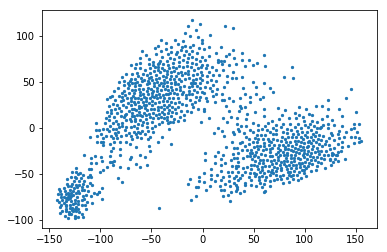

In [14]:
plt.scatter(raw_tsne_out.values[:, 0], raw_tsne_out.values[:, 1], s=5)

In [15]:
scaled_tsne_out = tsne.fit_transform(rnaseq_scaled_df)
scaled_tsne_out = pd.DataFrame(scaled_tsne_out, columns=['1', '2'])
scaled_tsne_out.index = rnaseq_scaled_df.index
scaled_tsne_out.index.name = 'tcga_uuid'
#scaled_tsne_out_file = os.path.join('data', 'LUNG', 'lung_scaled_tsne_features.tsv')
#scaled_tsne_out.to_csv(scaled_tsne_out_file, sep='\t')
print(scaled_tsne_out.shape)

(1129, 2)


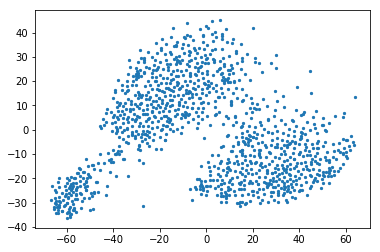

In [16]:
plt.scatter(scaled_tsne_out.values[:, 0], scaled_tsne_out.values[:, 1], s=5)

In [17]:
zeroone_tsne_out = tsne.fit_transform(rnaseq_scaled_zeroone_df)
zeroone_tsne_out = pd.DataFrame(zeroone_tsne_out, columns=['1', '2'])
zeroone_tsne_out.index = rnaseq_scaled_zeroone_df.index
zeroone_tsne_out.index.name = 'tcga_uuid'
#zeroone_tsne_out_file = os.path.join('data', 'LUNG', 'lung_scaled_zeroone_tsne_features.tsv')
#zeroone_tsne_out.to_csv(zeroone_tsne_out_file, sep='\t')
print(scaled_tsne_out.shape)

(1129, 2)


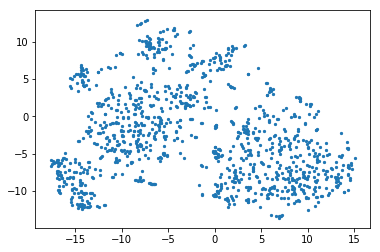

In [18]:
plt.scatter(zeroone_tsne_out.values[:,0], zeroone_tsne_out.values[:,1], s=5)

In [6]:
rna_zeroone_file = os.path.join('data', 'pancan', 'pancan_scaled_zeroone_rnaseq.tsv.gz')
if not os.path.isfile(rna_zeroone_file):
    rnaseq_zeroone_file = os.path.join('data', 'pancan_scaled_zeroone_rnaseq.tsv')
    df = pd.read_table(rnaseq_zeroone_file, index_col=0)
    df.to_csv(rna_zeroone_file, sep='\t', compression='gzip')

rnaseq_zeroone_df = pd.read_table(rna_zeroone_file, index_col=0)

print(rnaseq_zeroone_df.shape)
rnaseq_zeroone_df.head(2)

(10459, 5000)


,RPS4Y1,XIST,KRT5,AGR2,CEACAM5,KRT6A,KRT14,CEACAM6,DDX3Y,KDM5D,...,FAM129A,C8orf48,CDK5R1,FAM81A,C13orf18,GDPD3,SMAGP,C2orf85,POU5F1B,CHST2
TCGA-02-0047-01,0.678296,0.289910,0.034230,0.0,0.0,0.084731,0.031863,0.037709,0.746797,0.687833,...,0.440610,0.428782,0.732819,0.634340,0.580662,0.294313,0.458134,0.478219,0.168263,0.638497
TCGA-02-0055-01,0.200633,0.654917,0.181993,0.0,0.0,0.100606,0.050011,0.092586,0.103725,0.140642,...,0.620658,0.363207,0.592269,0.602755,0.610192,0.374569,0.722420,0.271356,0.160465,0.602560


In [7]:
tsne_zeroone = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=20,
                     learning_rate=300, n_iter=400)
tsne_zeroone_out = tsne.fit_transform(rnaseq_zeroone_df)
tsne_zeroone_out = pd.DataFrame(tsne_zeroone_out, columns=['1', '2'])
tsne_zeroone_out.index = rnaseq_zeroone_df.index
tsne_zeroone_out.index.name = 'tcga_uuid'

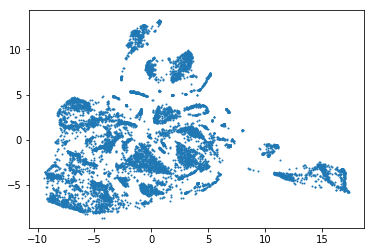

In [9]:
plt.scatter(tsne_zeroone_out.values[:, 0], tsne_zeroone_out.values[:, 1], s=1)